In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

![routes.png](routes.png)

In [250]:
routes_df = pd.DataFrame({
    "route_code": [
        "VJRQ+2M|RMJJ+F4",
        "WH5F+26|WJ8X+F5W",
        "XJPW+92|WJP4+FF",
        "2HVW+G8|XJXR+WG",
        "XHFC+WMF|WGGC+MG",
        "XPC7+72|XM33+J3",
        "WHCJ+26|XGCP+FV",
        "XMW9+G8|WMJR+V4",
        "XHJ7+MG|WJM6+VC",
        "WHR9+R6|XJGF+6J",
    ]
})
# routes_df = pd.DataFrame({"route_code": ["XJG4+7J|5PX4+HQ"]})
# routes_df = pd.DataFrame({"route_code": ["XMW9+G8|WMJR+V4"]})

locations = pd.read_csv("csv-locations_12.9514242_77.6590212.csv").to_dict(orient='list')
locate = lambda plus_code: locations['location'][locations['plus_code'].index(plus_code)]

df = pd.read_csv("csv-bangalore_traffic.csv")
# Keep only those rows of df that correspond to routes in routes_df
df = df[df['route_code'].isin(routes_df['route_code'])]
display(df)

,date,time,route_code,duration,distance
2,2025-09-25,14:25,VJRQ+2M|RMJJ+F4,23,10.3
3,2025-09-25,14:25,WH5F+26|WJ8X+F5W,25,10.2
4,2025-09-25,14:25,XJPW+92|WJP4+FF,38,10.4
5,2025-09-25,14:25,2HVW+G8|XJXR+WG,31,9.9
6,2025-09-25,14:25,XHFC+WMF|WGGC+MG,36,11.0
...,...,...,...,...,...
1210,2025-09-29,23:20,XPC7+72|XM33+J3,18,9.4
1211,2025-09-29,23:20,WHCJ+26|XGCP+FV,23,10.7
1212,2025-09-29,23:20,XMW9+G8|WMJR+V4,16,10.1
1213,2025-09-29,23:20,XHJ7+MG|WJM6+VC,20,10.6


In [251]:
display(df.describe())
display(df.describe(exclude='number'))
display(df['route_code'].value_counts())

,duration,distance
count,1020.000000,1020.000000
mean,27.623529,10.282745
std,8.740026,0.564953
min,13.000000,9.400000
25%,20.000000,9.900000
50%,27.000000,10.200000
75%,35.000000,10.600000
max,58.000000,13.700000


,date,time,route_code
count,1020,1020,1020
unique,5,50,10
top,2025-09-26,16:20,VJRQ+2M|RMJJ+F4
freq,230,50,102


route_code
VJRQ+2M|RMJJ+F4     102
WH5F+26|WJ8X+F5W    102
XJPW+92|WJP4+FF     102
2HVW+G8|XJXR+WG     102
XHFC+WMF|WGGC+MG    102
XPC7+72|XM33+J3     102
WHCJ+26|XGCP+FV     102
XMW9+G8|WMJR+V4     102
XHJ7+MG|WJM6+VC     102
WHR9+R6|XJGF+6J     102
Name: count, dtype: int64

In [252]:
# Process traffic data
df_traffic = df.copy()
df_traffic['year'] = pd.to_datetime(df_traffic['date']).dt.year
df_traffic['month'] = pd.to_datetime(df_traffic['date']).dt.month
df_traffic['date'] = pd.to_datetime(df_traffic['date']).dt.day
df_traffic['hour'] = pd.to_datetime(df_traffic['time'], format='%H:%M', errors='coerce').dt.hour
df_traffic['avg_speed'] = round(df_traffic['distance'] / (df_traffic['duration'] / 60), 2)
df_traffic['origin'] = df_traffic['route_code'].str.split('|').str[0].apply(locate)
df_traffic['destination'] = df_traffic['route_code'].str.split('|').str[1].apply(locate)
df_traffic = df_traffic[['year', 'month', 'date', 'hour', 'origin', 'destination', 'duration', 'distance', 'avg_speed']]
df_traffic = df_traffic.sort_values(['year', 'month', 'date', 'hour', 'duration'], ascending=[True, True, True, True, True]).reset_index(drop=True)
display(df_traffic.tail(15))

,year,month,date,hour,origin,destination,duration,distance,avg_speed
1005,2025,9,29,22,Swami Vivekananda Road Metro Station,"Christ University, Hosur Main Road",27,10.4,23.11
1006,2025,9,29,22,"Big Bull Temple, Basavanagudi","Shri Someshwara Swamy Temple, Halasuru",27,10.1,22.44
1007,2025,9,29,22,"Bethel AG Church, Hebbal",SMVT Railway Station,29,9.9,20.48
1008,2025,9,29,22,"RV Road Metro Station, Jayanagar 5th Block","Vijayanagar Metro Station, Chord Road",30,10.6,21.20
1009,2025,9,29,22,"Kempegowda Bus Station, Majestic","Sparsh Hospital, RR Nagar",31,12.8,24.77
1010,2025,9,29,23,Benniganahalli Metro Station,"Embassy TechVillage, Devarabisanahalli",16,10.1,37.88
1011,2025,9,29,23,Jaya Prakash Nagar Metro Station,"Hemavathi Park, HSR Layout",17,10.2,36.00
1012,2025,9,29,23,The Rameshwaram Cafe @ Brookfield,"Gawky Goose, Wind Tunnel Rd",18,9.4,31.33
1013,2025,9,29,23,Kudlu Gate Metro Station,Biocon Campus,19,12.6,39.79
1014,2025,9,29,23,Lulu Mall Bengaluru,Nexus Mall Koramangala,20,10.6,31.80


In [253]:
df_minmax = df_traffic[(df_traffic['hour'] >= 0) & (df_traffic['hour'] <= 23)].copy()

df_minmax['route'] = df_minmax.apply(lambda r: f"{r['origin']} \u2192 {r['destination']}", axis=1)
df_minmax = df_minmax.groupby(['route', 'hour'])['avg_speed'].mean().unstack().reset_index()
df_minmax['variance'] = df_minmax.iloc[:, 1:].apply(lambda row: row.max() - row.min(), axis=1)
df_minmax['max_hour'] = df_minmax.iloc[:, 1:-1].apply(lambda row: row.idxmax(), axis=1)
df_minmax['min_hour'] = df_minmax.iloc[:, 1:-2].apply(lambda row: row.idxmin(), axis=1)

df_minmax[['route', 'max_hour', 'min_hour', 'variance']].\
    sort_values(by='variance', ascending=False).reset_index(drop=True)

hour,route,max_hour,min_hour,variance
0,Lulu Mall Bengaluru → Nexus Mall Koramangala,4,18,23.1780
1,The Rameshwaram Cafe @ Brookfield → Gawky Goos...,4,16,22.8580
2,Kudlu Gate Metro Station → Biocon Campus,4,18,21.7860
3,Swami Vivekananda Road Metro Station → Christ ...,3,18,21.6710
4,"RV Road Metro Station, Jayanagar 5th Block → V...",3,18,20.5630
5,Jaya Prakash Nagar Metro Station → Hemavathi P...,2,18,18.0825
6,"Big Bull Temple, Basavanagudi → Shri Someshwar...",4,17,16.2240
7,"Bethel AG Church, Hebbal → SMVT Railway Station",3,18,15.9430
8,"Kempegowda Bus Station, Majestic → Sparsh Hosp...",2,18,15.5780
9,Benniganahalli Metro Station → Embassy TechVil...,5,17,14.9090


In [254]:
def plot_traffic_square(df_incoming, height='square'):
    """
    Plot average speed over time for all routes in the raw DataFrame.
    
    Parameters
    ----------
    df_incoming : pd.DataFrame
        Must contain columns: 
        - 'date' (str, YYYY-MM-DD)
        - 'time' (str, HH:MM)
        - 'route' (str, human-readable route name)
        - 'duration' (numeric, minutes)
        - 'distance' (numeric, km)
    height : str, default='square'
        Figure aspect ratio: 'square' (1:1), 'tall' (1:1.5), or 'wide' (1.5:1).
    """
    # 1) Build timestamps and compute average speed
    if df_incoming.empty:
        print("No data available in the dataset.")
        return

    df = df_incoming.copy()
    df['ts'] = pd.to_datetime(df_incoming['date'] + ' ' + df_incoming['time'], errors='coerce')
    df = df[['ts', 'route', 'duration', 'distance']]

    # Average speed (km/h) = 60 * distance / duration
    df['avg_speed'] = 60.0 * df['distance'] / df['duration'].replace(0, pd.NA)
        
    # 2) Build a common timeline (all observed timestamps)
    timeline = pd.Index(sorted(df['ts'].unique()))
    
    # 3) Fill missing data and smooth per route
    def fill_and_smooth_route(df):
        """Reindex to timeline, fill missing speeds, and smooth."""
        g = df.set_index('ts').reindex(timeline)
        
        # Fill average speed with neighbor mean
        speeds = pd.to_numeric(g['avg_speed'], errors='coerce')
        prev_vals = speeds.ffill()
        next_vals = speeds.bfill()
        filled = speeds.copy()
        
        mask_missing = speeds.isna()
        mask_both = mask_missing & prev_vals.notna() & next_vals.notna()
        filled.loc[mask_both] = (prev_vals.loc[mask_both] + next_vals.loc[mask_both]) / 2.0
        
        mask_prev_only = mask_missing & prev_vals.notna() & next_vals.isna()
        mask_next_only = mask_missing & next_vals.notna() & prev_vals.isna()
        filled.loc[mask_prev_only] = prev_vals.loc[mask_prev_only]
        filled.loc[mask_next_only] = next_vals.loc[mask_next_only]
        
        g['speed_filled'] = filled
        
        # Smooth the filled speeds (ts is already in the index before reset)
        ts_series = g.index.to_series()
        speed_series = g['speed_filled']
        
        mask_valid = speed_series.notna()
        ts_valid = ts_series[mask_valid]
        speed_valid = speed_series[mask_valid]
        
        if len(speed_valid) < 3:
            g['speed_smooth'] = speed_series
        else:
            try:
                from scipy.interpolate import PchipInterpolator
                x = ts_valid.map(pd.Timestamp.toordinal).to_numpy(dtype=float)
                y = speed_valid.to_numpy(dtype=float)
                x_all = ts_series.map(pd.Timestamp.toordinal).to_numpy(dtype=float)
                interp = PchipInterpolator(x, y)
                g['speed_smooth'] = pd.Series(interp(x_all), index=g.index)
            except Exception:
                # Fallback: centered rolling mean
                win = 3 if len(speed_valid) < 10 else 5
                g['speed_smooth'] = speed_series.rolling(window=win, center=True, min_periods=1).mean()
        
        return g.reset_index(names='ts')

    # Process each route
    frames = []
    for route in sorted(df['route'].unique()):
        route_data = df.loc[df['route'] == route, ['ts', 'route', 'avg_speed']]
        frames.append(fill_and_smooth_route(route_data))
    
    df_filled = pd.concat(frames, ignore_index=True).sort_values(['ts', 'route'])
    
    # 4) Determine figure size based on height parameter
    figsize = (16, 16)
    if height == 'square':
        pass
    elif height == 'wide':
        figsize = (20, 16)
    elif height == 'tall':
        figsize = (16, 24)
    else:
        raise ValueError(f"height must be 'square', 'tall', or 'wide', got: {height}")
    
    # 5) Plot: average speed, legend outside, HH-only x-axis
    hue_order = sorted(df_filled['route'].unique())
    palette = sns.color_palette("tab20", n_colors=len(hue_order))
    
    fig, ax = plt.subplots(figsize=figsize, dpi=300)
    sns.lineplot(
        data=df_filled,
        x='ts', y='speed_smooth',
        hue='route',
        hue_order=hue_order,
        palette=palette,
        ax=ax,
        linewidth=8, alpha=0.4
    )
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.margins(x=0)
    ax.set_xlim(df_filled['ts'].min(), df_filled['ts'].max())
    
    # Determine hour interval based on number of observations
    n_obs = len(timeline)
    if n_obs <= 50:
        hour_interval = 1
    elif n_obs <= 80:
        hour_interval = 3
    else:
        hour_interval = 6
    
    # X-axis as hours only (HH) with dynamic interval
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=hour_interval))
    ax.set_xlabel('Time (Hour)'.upper(), fontsize=14)
    ax.set_ylabel('Average Speed (km/h)'.upper(), fontsize=14)
    
    # Dynamic title based on time range
    start = df_filled['ts'].min()
    end = df_filled['ts'].max()
    time_range_hours = (end - start).total_seconds() / 3600
    ax.set_title('Route Average Speed Over Last 24 Hours')
    
    # Mark midnight with dark vertical lines and add day-of-week labels
    ylim = ax.get_ylim()
    
    # Find all midnight timestamps in the data range
    midnight_times = pd.date_range(
        start=start.normalize() + pd.Timedelta(days=1),
        end=end,
        freq='D'
    )
    
    for midnight in midnight_times:
        # Draw dark vertical line at midnight
        ax.axvline(x=midnight, color='black', linewidth=1, linestyle='-', zorder=1)
        
        # Add day-of-week label at the top, just to the right of the midnight line
        day_name = midnight.strftime('%A')
        ax.text(
            midnight, ylim[1] * 0.98,  # just below top frame
            day_name,
            ha='left',
            va='top',
            fontsize=11,
            fontweight='bold',
            color='black'
        )
    
    # Legend outside on the bottom:
    handles, labels = ax.get_legend_handles_labels()
    leg = ax.legend(
        handles, labels,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.08),
        ncol=2,
        frameon=True,
        borderaxespad=0.0,
        fontsize=12,
        borderpad=1.0,
        labelspacing=0.8
    )
    leg.get_frame().set_linewidth(0.8)
    leg.get_frame().set_edgecolor('#000000')
    plt.subplots_adjust(bottom=0.24)
    plt.tight_layout()
    plt.show()
    
    return df

In [255]:
def plot_route_boxplots(df_incoming, avg_speed=True, duration=True, legend=True):
    """
    Generate boxplots for route metrics.
    
    Parameters
    ----------
    df_incoming : pd.DataFrame
        Must contain columns: ts, route, duration, distance, avg_speed
    plot_type : str, default='both'
        Type of plot to generate:
        - 'speed': Average speed boxplot only
        - 'duration': Duration boxplot only
        - 'both': Both plots side-by-side (default)
    legend : bool, default=True
        If True, show route labels vertically below the x-axis.
        If False, hide x-axis labels.
    """
    df_box = df_incoming.copy()
    df_box['label'] = df_box['route']
    df_box.drop(['route'], axis=1, inplace=True)
    
    # Select metrics based on plot_type
    metrics = {}
    if avg_speed:
        metrics['avg_speed'] = 'Average speed (km/h)'
    if duration:
        metrics['duration'] = 'Duration (minutes)'
    if  metrics == {}:
        raise ValueError("At least one of avg_speed or duration must be True")

    # Sort routes by median avg_speed (descending) - use this order for all plots
    route_order = (
        df_box.groupby('label')['avg_speed']
              .median()
              .sort_values(ascending=False)
              .index.tolist()
    )

    # Create color map
    hue_order = sorted(df_box['label'].unique())
    palette = sns.color_palette("tab20", n_colors=len(hue_order))
    color_map = dict(zip(hue_order, palette))
    
    # Adjust figure size based on number of plots
    figsize = (12, 12) if len(metrics) == 1 else (16, 12)
    if legend:
        figsize = (figsize[0], figsize[1] + 4)
    
    fig, axes = plt.subplots(1, len(metrics), figsize=figsize, sharex=False, dpi=300)
    
    # Ensure axes is always iterable
    if len(metrics) == 1:
        axes = [axes]

    for ax, metric in zip(axes, metrics.keys()):
        sns.boxplot(
            data=df_box,
            x='label',
            y=df_box[metric],
            hue='label',
            order=route_order,
            hue_order=route_order,
            palette=color_map,
            dodge=False, 
            legend=False,
            ax=ax
        )
        
        # Make box faces semi-transparent
        for patch in ax.artists:
            fc = patch.get_facecolor()
            patch.set_facecolor((*fc[:3], 0.4))
        
        for line in ax.lines:
            line.set_alpha(0.4)
        
        ax.set_xlabel('')
        ax.set_ylabel(metrics[metric])
        ax.set_title(f'{metrics[metric]} by Route')
        
        # Control x-axis label visibility based on legend parameter
        if legend:
            ax.tick_params(axis='x', rotation=90, labelbottom=True, bottom=True)
        else:
            ax.tick_params(axis='x', labelbottom=False, bottom=False)
    
    plt.subplots_adjust(bottom=0.35)
    plt.tight_layout()
    plt.show()

In [256]:
filter_string = "date >= '2025-09-27'"

df_incoming = df.query(filter_string).copy()
df_incoming['route'] = df_incoming['route_code'].\
    apply(lambda r: f"{locate(r.split('|')[0])} \u2192 {locate(r.split('|')[1])}")
df_incoming = df_incoming[['date', 'time', 'route', 'duration', 'distance']].\
    reset_index(drop=True)

display(df_incoming)

,date,time,route,duration,distance
0,2025-09-27,00:22,Kudlu Gate Metro Station → Biocon Campus,16,10.3
1,2025-09-27,00:22,Jaya Prakash Nagar Metro Station → Hemavathi P...,16,10.2
2,2025-09-27,00:22,Swami Vivekananda Road Metro Station → Christ ...,22,10.5
3,2025-09-27,00:22,"Bethel AG Church, Hebbal → SMVT Railway Station",24,11.0
4,2025-09-27,00:22,"Kempegowda Bus Station, Majestic → Sparsh Hosp...",22,9.7
...,...,...,...,...,...
685,2025-09-29,23:20,The Rameshwaram Cafe @ Brookfield → Gawky Goos...,18,9.4
686,2025-09-29,23:20,"RV Road Metro Station, Jayanagar 5th Block → V...",23,10.7
687,2025-09-29,23:20,Benniganahalli Metro Station → Embassy TechVil...,16,10.1
688,2025-09-29,23:20,Lulu Mall Bengaluru → Nexus Mall Koramangala,20,10.6


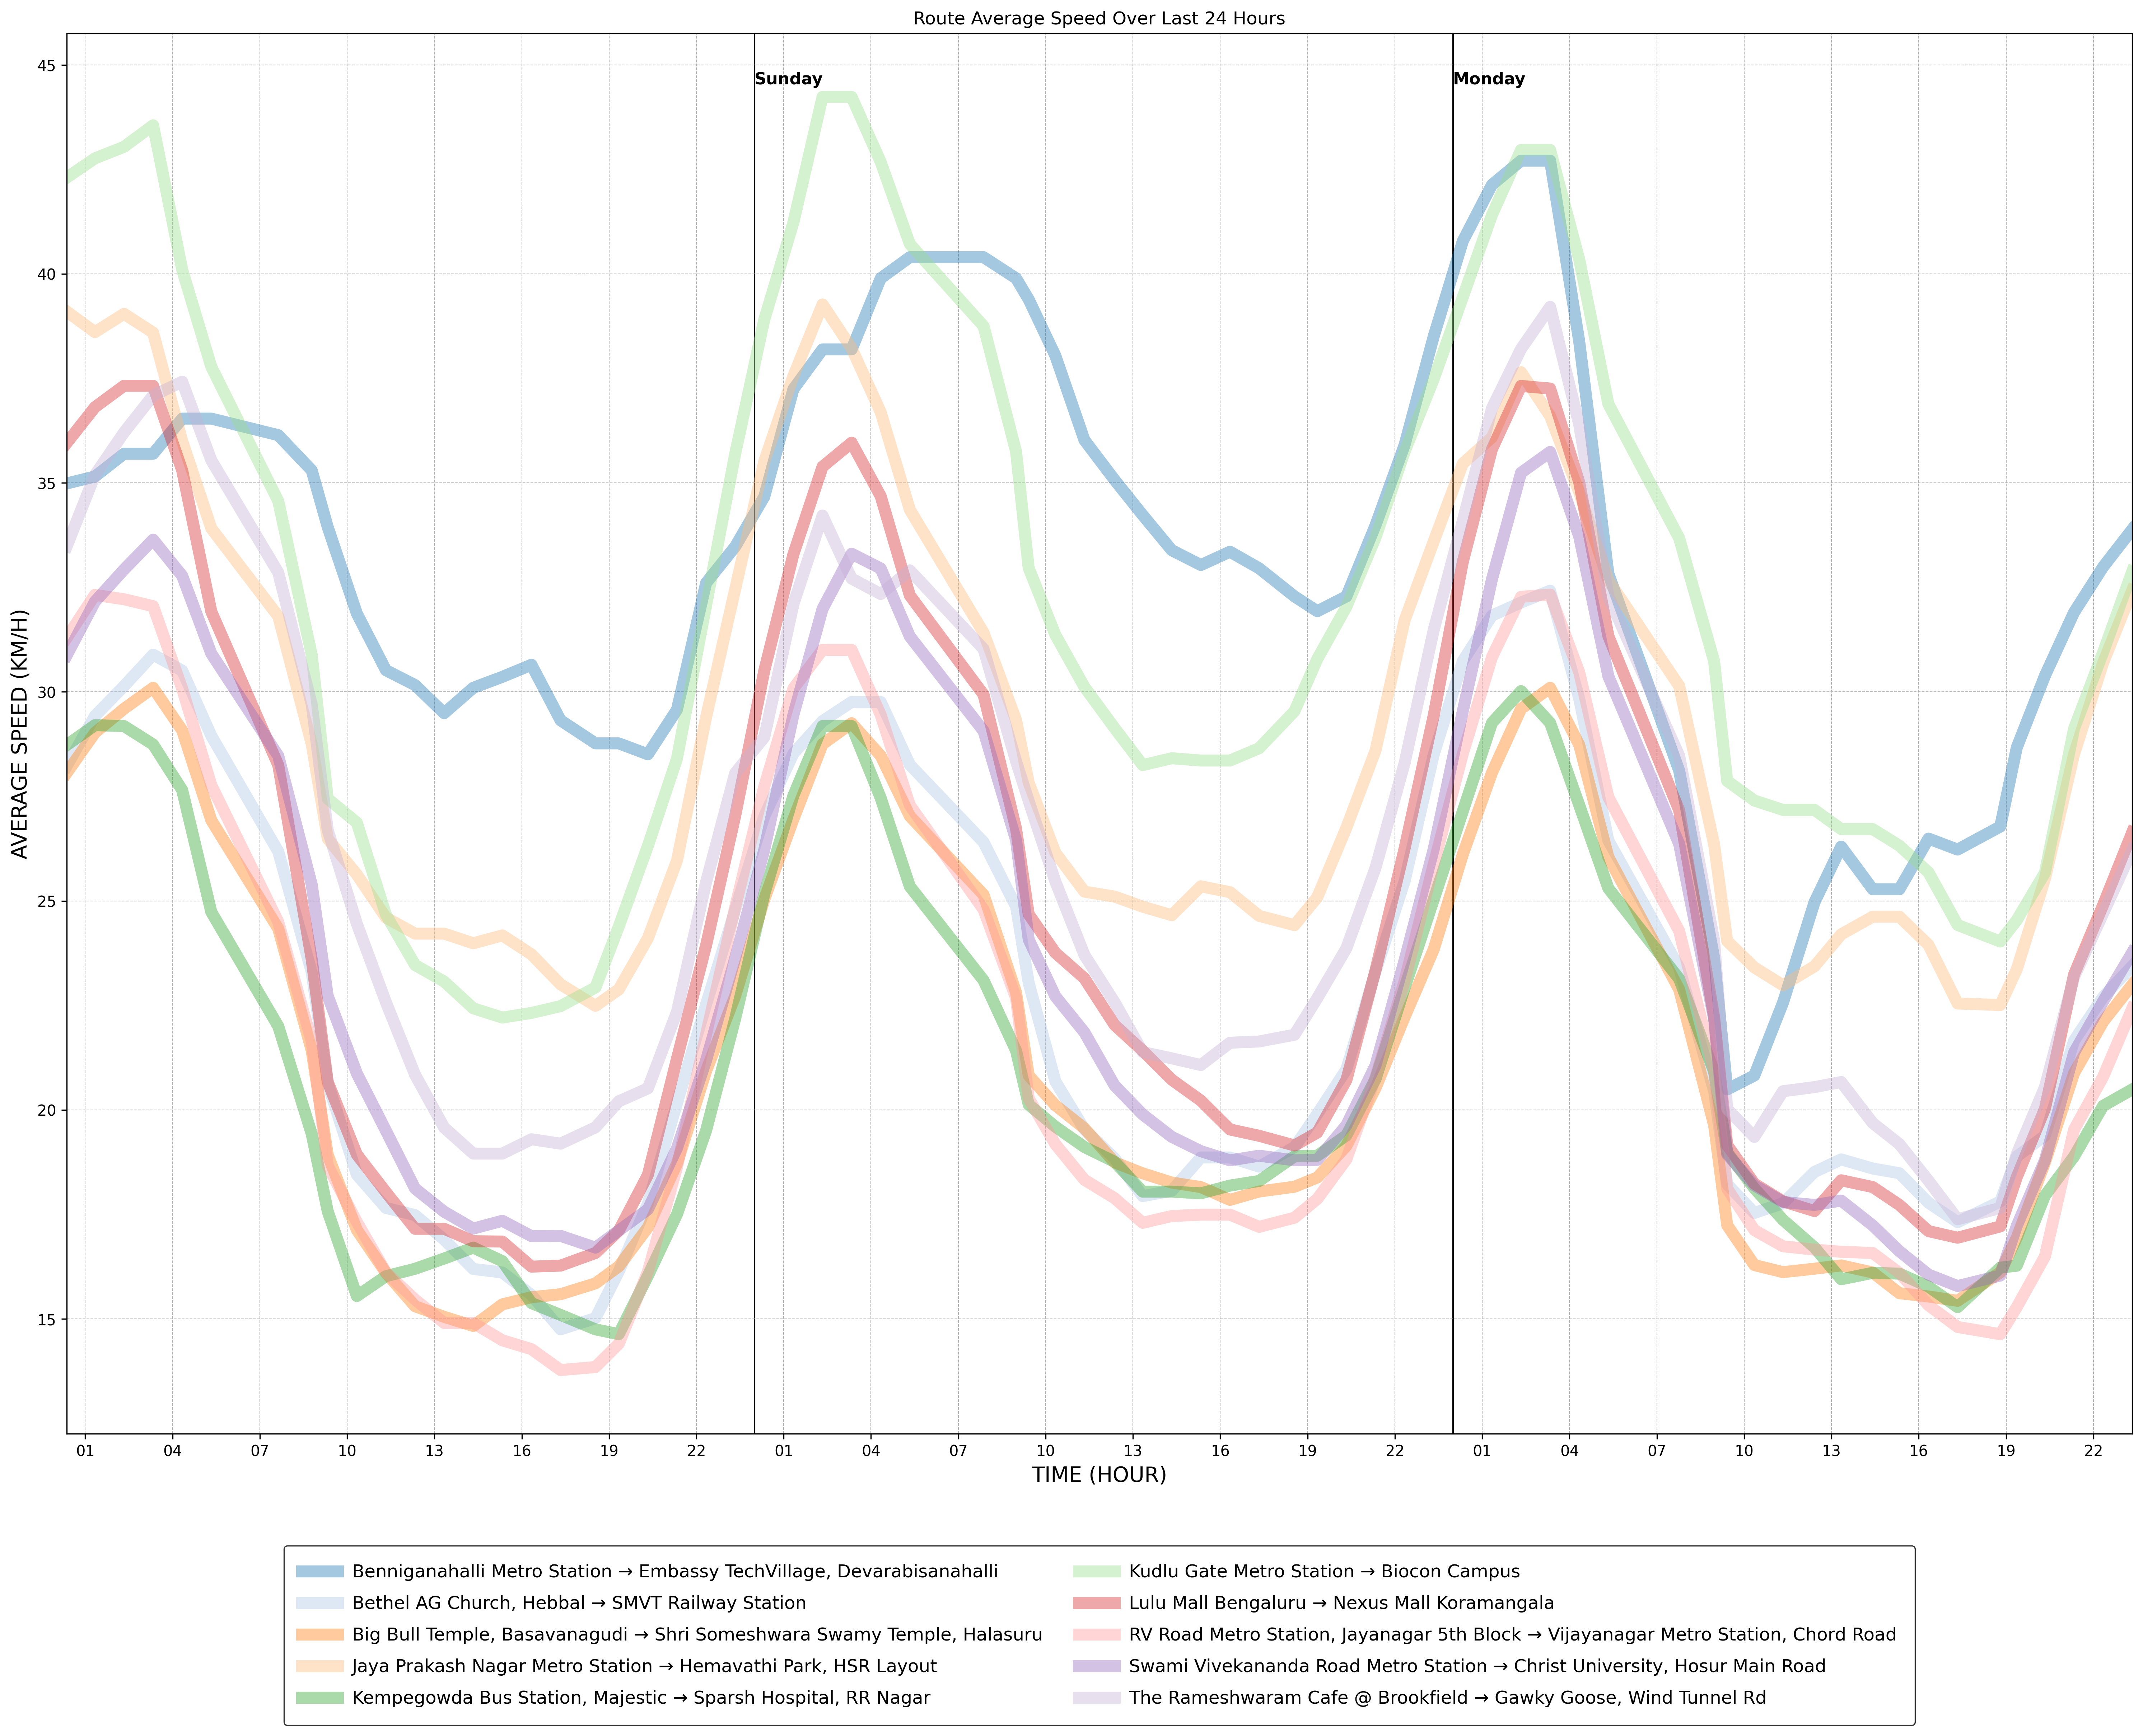

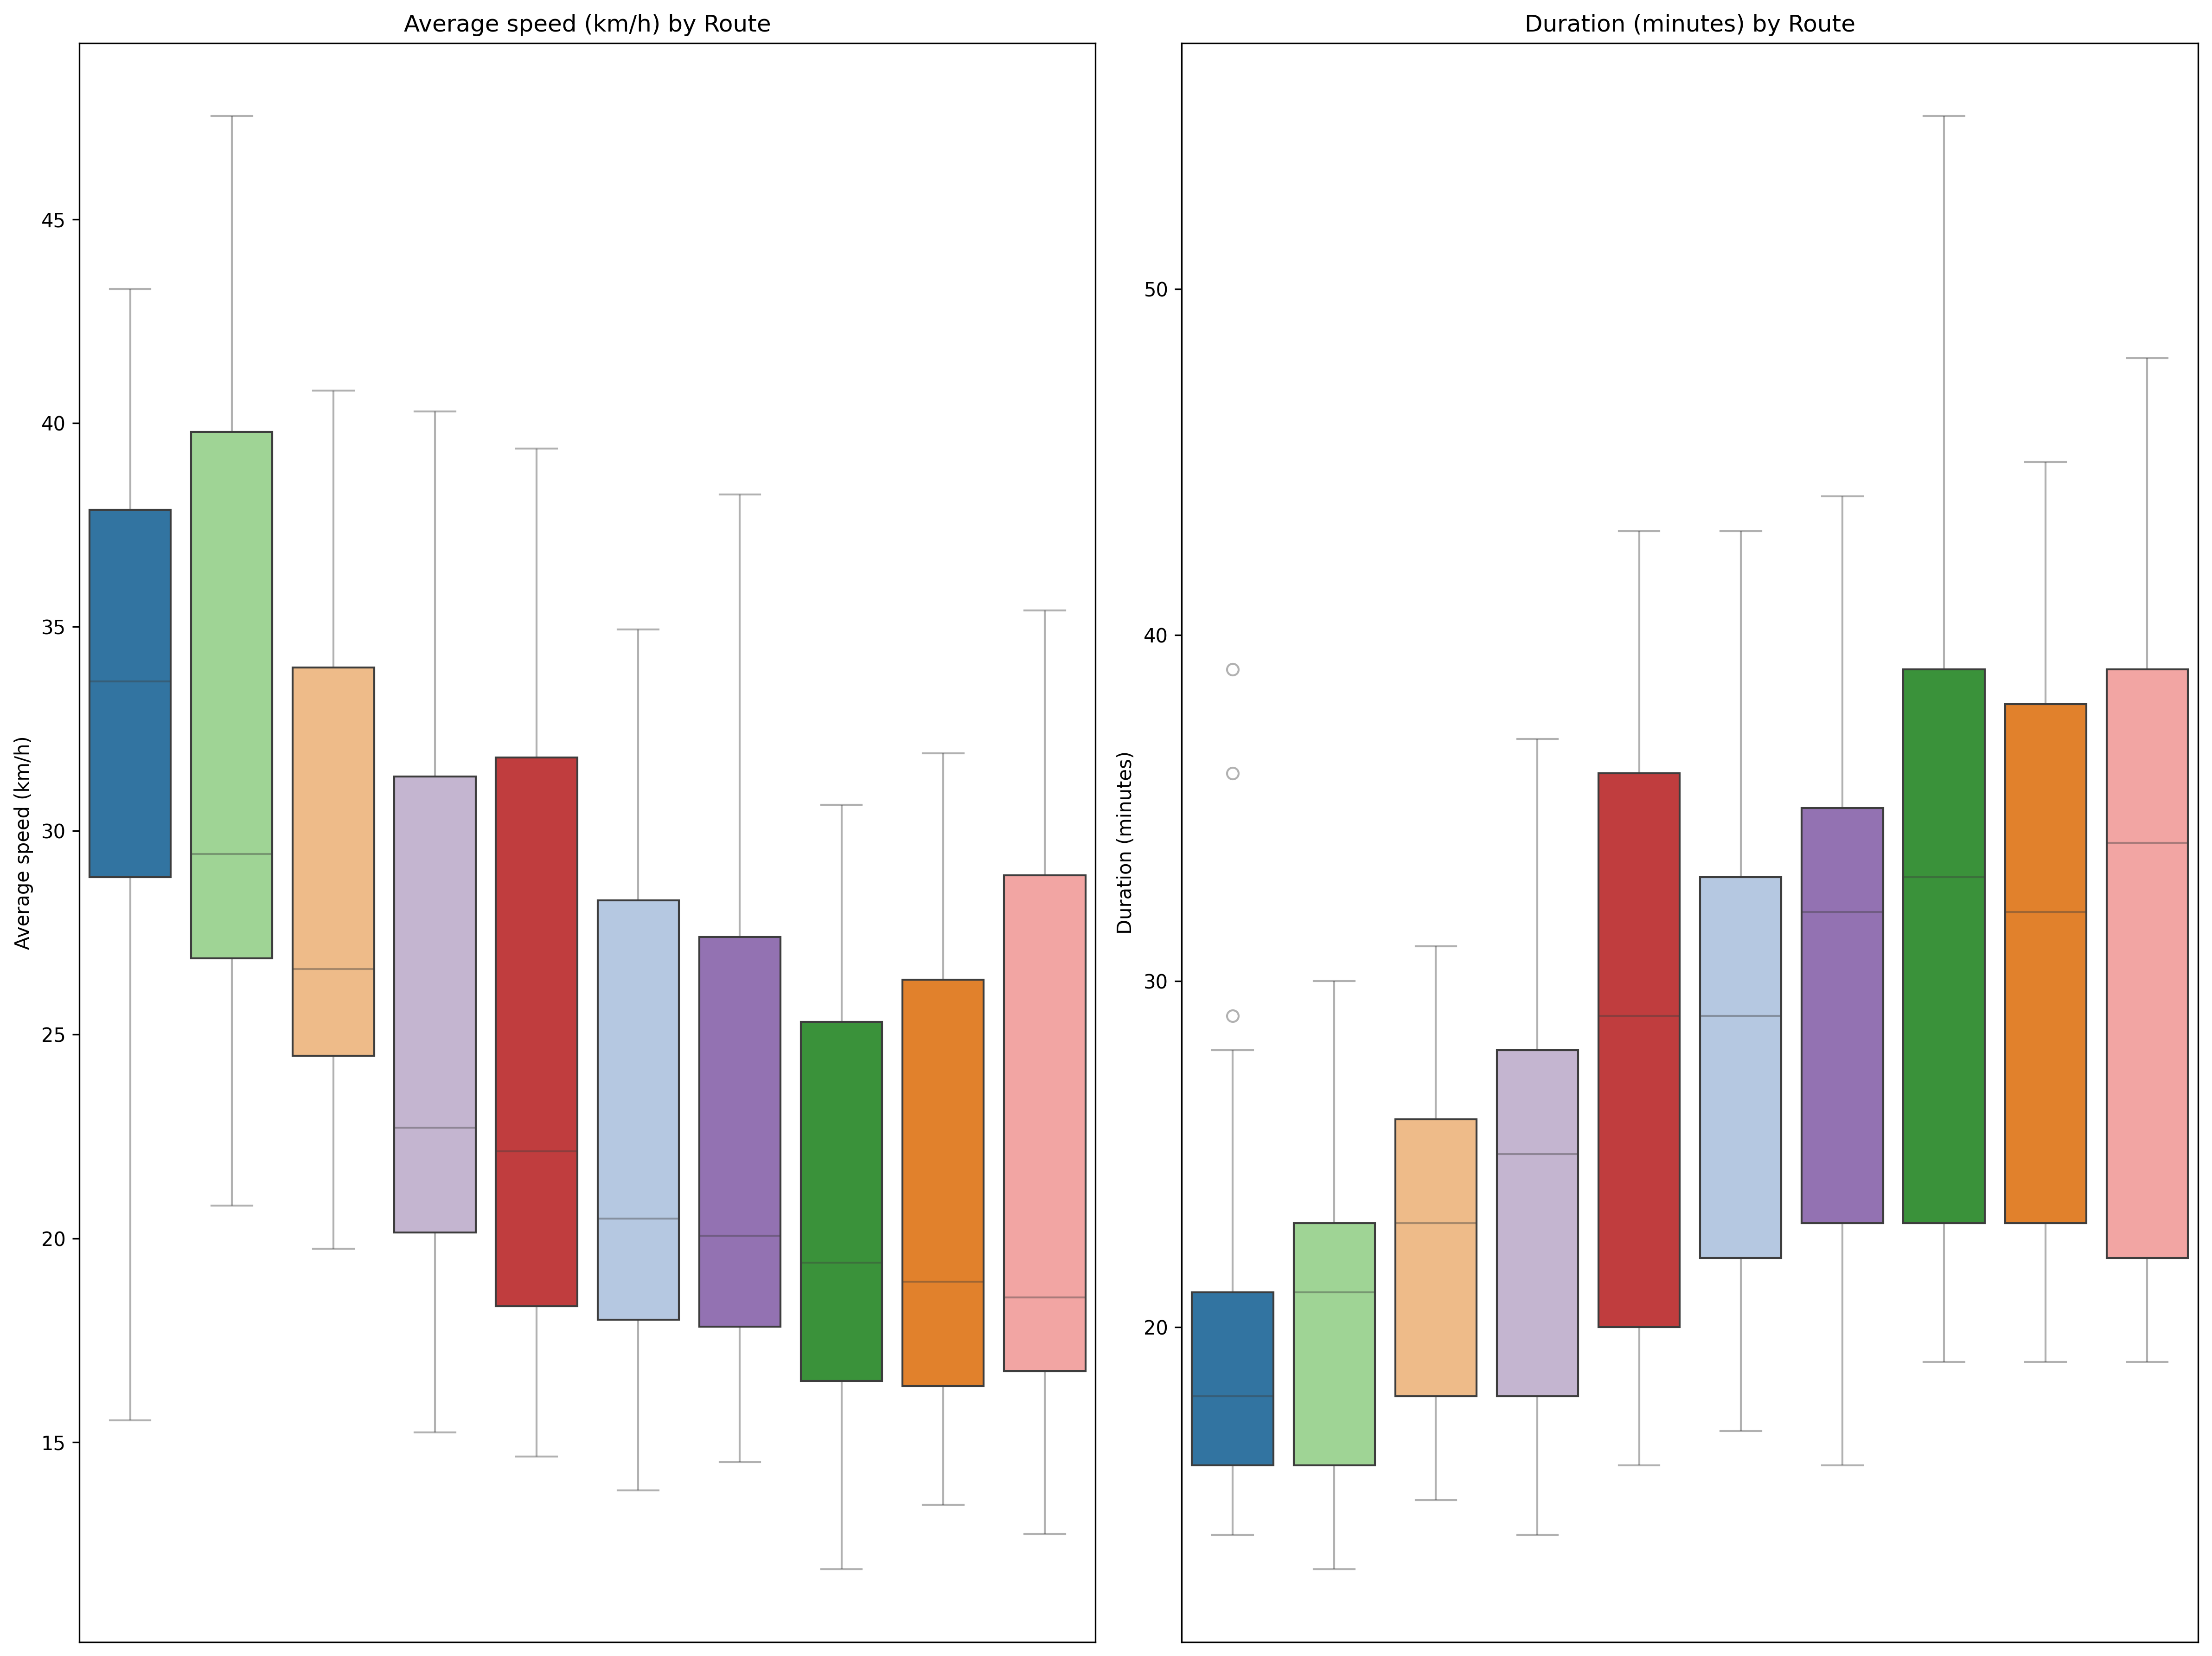

In [257]:
plot_route_boxplots(
    plot_traffic_square(df_incoming, height='wide'), 
            avg_speed=True, duration=True, legend=False)